<a href="https://colab.research.google.com/github/YuvanBharathi13/Machine-Learning/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/RandomForestData.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier
black_forest = RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
black_forest.fit(X_train,y_train)
y_pred = black_forest.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]


<Axes: >

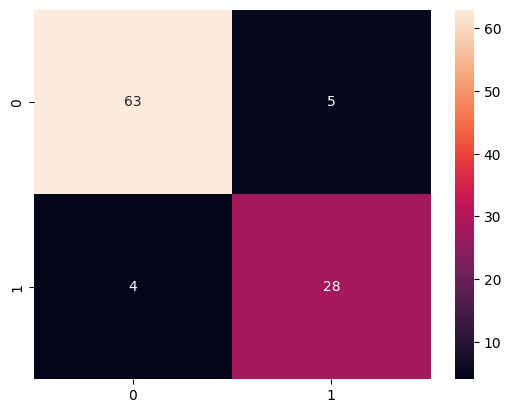

In [8]:
from sklearn.metrics import roc_curve,auc,precision_recall_curve,confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [9]:
fpr, tpr, threshholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
print(roc_auc)

0.9007352941176472


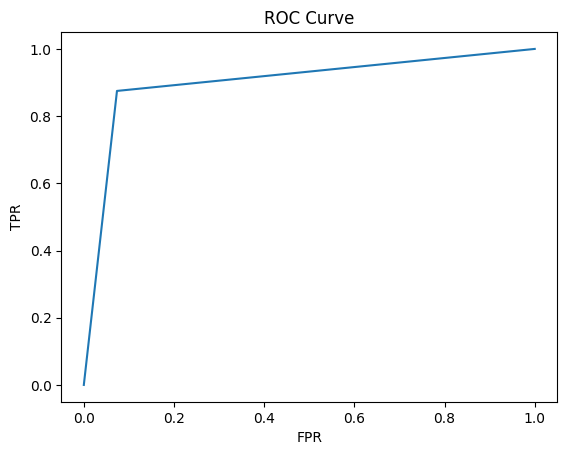

In [10]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

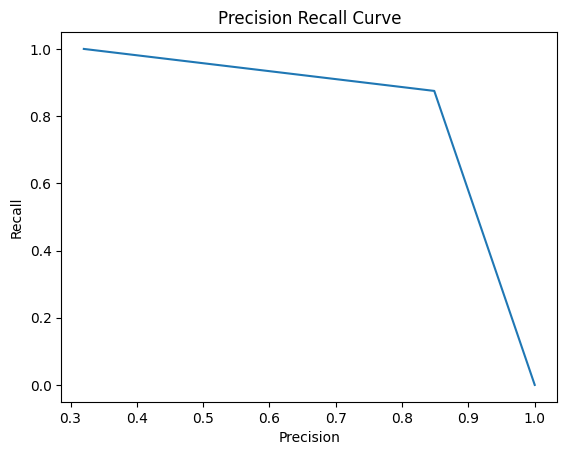

In [11]:
precision, recall, pr_thresh = precision_recall_curve(y_test,y_pred)
plt.plot(precision,recall)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision Recall Curve")
plt.show()

In [13]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled,y_resampled = smote.fit_resample(X,y)
print(X_resampled)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 ...
 [    51 144000]
 [    43 129013]
 [    47  33935]]


In [14]:
print(accuracy_score(y_test,y_pred))

0.91


In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100

